In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing

In [3]:
atributos_df = pd.read_csv("trabajo raiz/large_twitch_features.csv")
relaciones_df = pd.read_csv("trabajo raiz/large_twitch_edges.csv")

In [4]:
print(atributos_df.head(5))
print(relaciones_df.head(5))

    views  mature  life_time  created_at  updated_at  numeric_id  \
0    7879       1        969  2016-02-16  2018-10-12           0   
1     500       0       2699  2011-05-19  2018-10-08           1   
2  382502       1       3149  2010-02-27  2018-10-12           2   
3     386       0       1344  2015-01-26  2018-10-01           3   
4    2486       0       1784  2013-11-22  2018-10-11           4   

   dead_account language  affiliate  
0             0       EN          1  
1             0       EN          0  
2             0       EN          1  
3             0       EN          0  
4             0       EN          0  
   numeric_id_1  numeric_id_2
0         98343        141493
1         98343         58736
2         98343        140703
3         98343        151401
4         98343        157118


In [ ]:
grafo = nx.Graph()


In [5]:
for index, row in atributos_df.iterrows():
    numeric_id = row['numeric_id']
    atributos = {key: row[key] for key in row.keys() if key != 'numeric_id'}
    grafo.add_node(numeric_id, **atributos)


In [6]:
for index, row in relaciones_df.iterrows():
    target1 = row['numeric_id_1']
    target2 = row['numeric_id_2']
    grafo.add_edge(target1, target2)


In [183]:
# Como no se puede mostrar el grafo completo debido a su tamaño podemos pasarle unos vertices que sepamos que son
# conexos y comprobar que tienen arista entre ellos.

# Mediante una lista de vertices pasada por parametro comprobamos el subgrafo para dichos vertices y sus aristas

def mostrar_grafo_para_vertices(vertices):
    if not all(v in grafo for v in vertices):
        print("Los vértices no existen en el grafo")
    else:
        # Crear el subgrafo con la lista de vertices
        G_subgrafo = grafo.subgraph(vertices)

        # Crear una nueva figura y ejes
        fig, ax = plt.subplots()
        nx.draw(G_subgrafo, with_labels=True, node_color='lightblue', node_size=500, font_weight='bold', ax=ax)

    # Mostrar el grafo en una ventana
        plt.axis('off')
        plt.show()
    

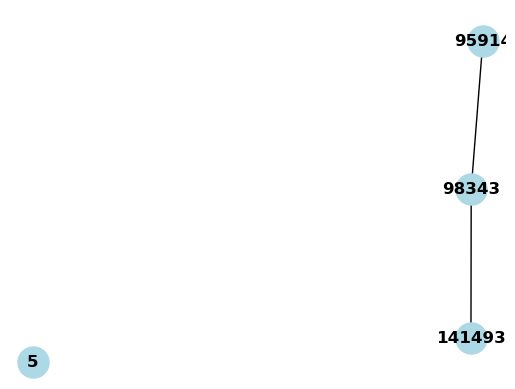

In [187]:
mostrar_grafo_para_vertices([98343, 141493, 95914, 5])

In [7]:
# Creo la variable atributo_codificados como una copia de los atributos originales para sustituirla posteriormente
# con las codificaciones necesarias --> LANGUAGE

atributos_codificados = atributos_df.copy()


In [ ]:
def calcular_matriz_adyacencia(grafo):
    return nx.adjacency_matrix(grafo)


In [7]:

centralidad_grado = list(nx.degree_centrality(grafo).values())

In [188]:
'''import random

# Parámetros del muestreo
num_samples = 100  # Número de nodos de inicio para el muestreo
sample_size = 1000  # Tamaño del subgrafo muestreado

# Selección de nodos de inicio para el muestreo
start_nodes = random.sample(grafo.nodes(), num_samples)

# Subgrafo muestreado
subgraph = grafo.subgraph(start_nodes).copy()

# Cálculo de la centralidad intermedia en el subgrafo
centralidad_intermedia = list(nx.betweenness_centrality(grafo).values())

centralidad_katz = list(nx.katz_centrality_numpy(grafo, alpha=0.1,
beta=1.0).values())

grados = [j for i,j in grafo.degree]'''



'import random\n\n# Parámetros del muestreo\nnum_samples = 100  # Número de nodos de inicio para el muestreo\nsample_size = 1000  # Tamaño del subgrafo muestreado\n\n# Selección de nodos de inicio para el muestreo\nstart_nodes = random.sample(grafo.nodes(), num_samples)\n\n# Subgrafo muestreado\nsubgraph = grafo.subgraph(start_nodes).copy()\n\n# Cálculo de la centralidad intermedia en el subgrafo\ncentralidad_intermedia = list(nx.betweenness_centrality(grafo).values())\n\ncentralidad_katz = list(nx.katz_centrality_numpy(grafo, alpha=0.1,\nbeta=1.0).values())\n\ngrados = [j for i,j in grafo.degree]'

In [9]:
'''atributos_relacionales = {"Centralidad_grado":centralidad_grado,
"Centralidad_intermedia":centralidad_intermedia,
 "Centralidad_katz":centralidad_katz, "Grados":grados}'''

In [181]:
## Funcion que devuelve los vertices a los que estan conectado un v1

def get_neighbors(grafo, id_vertice):
    # Verificar si el vértice existe en el grafo
    if id_vertice not in grafo.nodes:
        print("El vértice con ID", id_vertice, "no existe en el grafo.")
        return []
    
    # Obtener los vecinos del vértice
    vecinos = list(grafo.neighbors(id_vertice))
    
    return vecinos


vertice_id = 98343
conectados = get_neighbors(grafo, vertice_id)
print("Los vértices conectados al vértice", vertice_id, "son:", sorted(conectados))


Los vértices conectados al vértice 98343 son: [495, 1679, 3181, 3635, 10372, 10408, 16783, 30520, 40675, 44326, 48850, 54230, 58736, 59892, 63150, 66893, 75403, 78899, 87516, 89631, 90148, 90697, 95697, 95914, 106969, 113417, 116648, 122269, 123861, 124827, 125430, 140703, 141493, 143081, 145281, 151401, 155127, 157118, 159097]


In [182]:
get_neighbors(grafo, 3)

[86321,
 19470,
 2259,
 115813,
 159497,
 38538,
 117766,
 72013,
 116924,
 68392,
 96863]

In [ ]:
## Para codificar los idiomas creo un diccionario[idioma] = num_clave, que asigne un numero desde [1:idiomas.size]
# a cada uno de los idiomas del dataset

In [189]:
idiomas_set = set(atributos_df["language"])  # Me quedo solo con los elementos no repetidos
idiomas = list(idiomas_set)
diccionario = {}
for idioma, i in enumerate(idiomas, start = 1):
    diccionario[i] = idioma
    
print(diccionario)


{'OTHER': 1, 'HU': 2, 'DE': 3, 'PL': 4, 'TR': 5, 'EN': 6, 'NL': 7, 'PT': 8, 'SV': 9, 'KO': 10, 'CS': 11, 'DA': 12, 'RU': 13, 'ZH': 14, 'JA': 15, 'FR': 16, 'FI': 17, 'IT': 18, 'ES': 19, 'TH': 20, 'NO': 21}


In [190]:
# Al dataset le eliminamos la columna de idiomas y se la sustituimos por una nueva que contenga los idomas codificados

sin_languages = atributos_df.drop("language", axis=1).drop("affiliate", axis = 1).copy()
#print(sin_languages)
solo_languages = atributos_df["language"].copy()
solo_affiliate = atributos_df["affiliate"].copy()
#print(solo_languages)
idiomas_codificados = solo_languages.map(diccionario)
#print(idiomas_codificados)
#print(atributoa_codificados)

sin_languages["language"] = idiomas_codificados


In [191]:
sin_languages["created_at"] = sin_languages["created_at"].str.replace("-", "")
sin_languages["updated_at"] = sin_languages["updated_at"].str.replace("-", "")
sin_languages["created_at"] = sin_languages["created_at"].astype('int64')
sin_languages["updated_at"] = sin_languages["updated_at"].astype('int64')

In [192]:
atributos_codificados = sin_languages
objetivo = solo_affiliate


In [193]:
print(atributos_codificados.head(10))

    views  mature  life_time  created_at  updated_at  numeric_id  \
0    7879       1        969    20160216    20181012           0   
1     500       0       2699    20110519    20181008           1   
2  382502       1       3149    20100227    20181012           2   
3     386       0       1344    20150126    20181001           3   
4    2486       0       1784    20131122    20181011           4   
5    4987       1       1288    20150403    20181012           5   
6     234       0        358    20170914    20180907           6   
7     775       1        577    20170314    20181012           7   
8   69020       0       1781    20131122    20181008           8   
9   32073       0        499    20170531    20181012           9   

   dead_account  language  
0             0         6  
1             0         6  
2             0         6  
3             0         6  
4             0         6  
5             0         6  
6             0         6  
7             0        16  

In [31]:
print(objetivo.head())

0    1
1    0
2    1
3    0
4    0
Name: affiliate, dtype: int64


In [32]:
## Para comprobar si cada canal es afiliado o no mediante un modelo no relacional podemos usar por ejemplo naive bayes
# para los atributos ya codificados

In [33]:
from sklearn import naive_bayes
from sklearn import model_selection

In [78]:
(atributos_entrenamiento, atributos_prueba,
 objetivo_entrenamiento, objetivo_prueba) = model_selection.train_test_split(
        # Conjuntos de datos a dividir, usando los mismos índices para ambos
        atributos_codificados, objetivo,
        # Valor de la semilla aleatoria, para que el muestreo sea reproducible,
        # a pesar de ser aleatorio
        random_state=125,
        # Tamaño del conjunto de prueba
        test_size=.33,
        # Estratificamos respecto a la distribución de valores en la variable objetivo
        stratify=objetivo)

In [79]:
clasif_NB = naive_bayes.CategoricalNB(alpha=1.0)  # alpha es el parámetro de suavizado
clasif_NB.fit(atributos_entrenamiento, objetivo_entrenamiento)

CategoricalNB()

In [80]:
print(atributos_codificados.tail())

         views  mature  life_time  created_at  updated_at  numeric_id  \
168109    4965       0        810    20160720    20181008      168109   
168110    4128       1       2080    20130131    20181012      168110   
168111    3545       0       1797    20131108    20181010      168111   
168112  892736       1       2135    20121207    20181012      168112   
168113     791       0       2005    20130122    20180720      168113   

        dead_account  language  
168109             0         6  
168110             0         6  
168111             0         6  
168112             0         6  
168113             0         6  


In [81]:
nuevos_ejemplos = pd.DataFrame([[62345, 1, 2876, 20020928, 20020928, 168113, 0, 6],
[60012, 1, 1698, 20080815, 20080815, 168113, 0, 7],
[60135, 1, 1234, 20050719, 20050719, 168113, 0, 5],
[61234, 1, 2789, 20031205, 20031205, 168113, 0, 8],
[60567, 1, 3210, 20040502, 20040502, 168113, 0, 5],
[61789, 1, 2678, 20060317, 20060317, 168113, 0, 6],
[63098, 1, 3456, 20120214, 20120214, 168113, 0, 7],
[61987, 1, 1923, 20010530, 20010530, 168113, 0, 5],
[62234, 1, 2890, 20100123, 20100123, 168113, 0, 7],
[60321, 1, 2378, 20180501, 20180501, 168113, 0, 8]
 ])

In [ ]:
prediccion = clasif_NB.predict(nuevos_ejemplos)
print(prediccion)

In [ ]:
score = clasif_NB.score(atributos_prueba, objetivo_prueba)
print(score)

In [88]:
def prediccionNaiveBayes(nuevos_ejemplos):
    prediccion = clasif_NB.predict(nuevos_ejemplos)
    score = clasif_NB.score(atributos_prueba, objetivo_prueba)
    print("La prediccion para los ejemplos dados sera:", prediccion)
    print("El score conseguido mediante naive bayes sera:", score)

In [ ]:
prediccionNaiveBayes(nuevos_ejemplos)

In [3]:
from sklearn import neighbors

In [ ]:
clasif_kNN = neighbors.KNeighborsClassifier(
    n_neighbors=5,  # Número de vecinos a considerar
    metric='hamming'  # Distancia de Hamming como métrica de cercanía:
                      # fracción de atributos con valores distintos
)
clasif_kNN.fit(atributos_entrenamiento, objetivo_entrenamiento)

In [ ]:
distancias, vecinos = clasif_kNN.kneighbors(nuevos_ejemplos)

In [104]:
def prediccionKNN(nuevos_ejemplos):
    predicciones = clasif_kNN.predict(nuevos_ejemplos)
    score = clasif_kNN.score(atributos_prueba, objetivo_prueba)
    print("La prediccion para los ejemplos dados sera:", prediccion)
    print("El score conseguido mediante KNN sera:", score)

In [178]:
def comparacion_de_scores(atributos_prueba, objejivos_prueba):
    regresion_lineal = lr_multiple.score(atributos_prueba, objetivo_prueba)
    knn = clasif_kNN.score(atributos_prueba, objetivo_prueba)
    nb = clasif_NB.score(atributos_prueba, objetivo_prueba)
    lista = sorted([regresion_lineal, knn, nb], reverse=True)
    print("KNN:", knn)
    print("Naive Bayes:", nb)
    print("Los modelos mas eficaces serian:", lista)
    
    print("El modelo mas optimo seria:", max(regresion_lineal, knn, nb)) 

In [179]:
comparacion_de_scores(atributos_prueba, objetivo_prueba)

Regresion lineal: 0.07510016509621964
KNN: 0.6208767439345326
Naive Bayes: 0.7139947366523667
Los modelos mas eficaces serian: [0.7139947366523667, 0.6208767439345326, 0.07510016509621964]
El modelo mas optimo seria: 0.7139947366523667
